In [1]:
import sys
sys.path.append('..')  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from fuzzy_systems.learning import ANFIS

Dados: 150 amostras
Treino: 105, Teste: 45


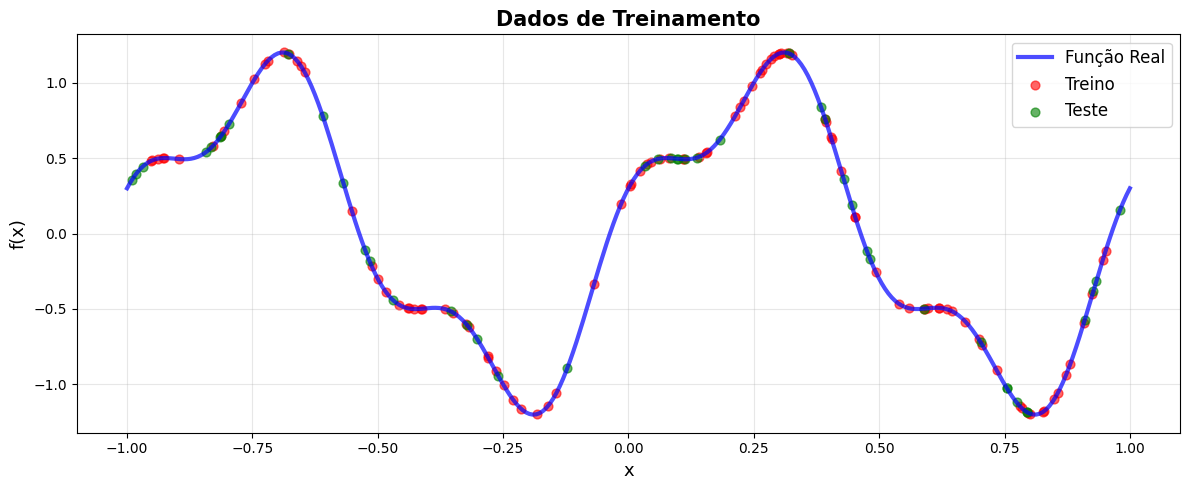

In [8]:
# Dados
N_SAMPLES = 150
X_RANGE = (-1, 1)

X = np.random.uniform(X_RANGE[0], X_RANGE[1], (N_SAMPLES, 1))

def funcao_alvo(x):
    return np.sin(2 * np.pi * x) + 0.3 * np.cos(6 * np.pi * x)

y = funcao_alvo(X).flatten()

# Dividir
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Dados: {N_SAMPLES} amostras")
print(f"Treino: {len(X_train)}, Teste: {len(X_test)}")

# Visualizar
fig, ax = plt.subplots(figsize=(12, 5))
x_plot = np.linspace(X_RANGE[0], X_RANGE[1], 300).reshape(-1, 1)
y_plot = funcao_alvo(x_plot)

ax.plot(x_plot, y_plot, 'b-', linewidth=3, alpha=0.7, label='Função Real')
ax.scatter(X_train, y_train, c='red', s=40, alpha=0.6, label='Treino')
ax.scatter(X_test, y_test, c='green', s=40, alpha=0.6, label='Teste')
ax.set_xlabel('x', fontsize=13)
ax.set_ylabel('f(x)', fontsize=13)
ax.set_title('Dados de Treinamento', fontsize=15, weight='bold')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [53]:
# Criar e treinar ANFIS
anfis = ANFIS(
    n_inputs=1,
    n_mfs=9,
    mf_type='gaussmf',
    learning_rate=1e-2,
    lambda_l2=0.01,
    batch_size=None
)

anfis.fit(X_train, y_train, epochs=500, verbose=True,
              X_val=X_test, y_val=y_test, early_stopping_patience=100)



ANFIS - Treinamento
Arquitetura:
  • Entradas: 1
  • MFs por entrada: [9]
  • Regras: 9
  • Tipo MF: gaussmf

Treinamento:
  • Modo: Batch GD
  • Samples: 105
  • Batch size: 105
  • Batches/época: 1

Regularização:
  • Tipo: Ridge (L2)
  • λ₁ (L1): 0.0
  • λ₂ (L2): 0.01

Inicializando consequentes com LSE...
RMSE inicial: 0.011711

Época   1/500 - Train RMSE: 0.011727, Val RMSE: 0.040600 | Custo: 0.001143
Época  10/500 - Train RMSE: 0.011863, Val RMSE: 0.040647 | Custo: 0.001142
Época  20/500 - Train RMSE: 0.012017, Val RMSE: 0.040701 | Custo: 0.001140
Época  30/500 - Train RMSE: 0.012176, Val RMSE: 0.040756 | Custo: 0.001139
Época  40/500 - Train RMSE: 0.012338, Val RMSE: 0.040813 | Custo: 0.001138
Época  50/500 - Train RMSE: 0.012505, Val RMSE: 0.040872 | Custo: 0.001137
Época  60/500 - Train RMSE: 0.012676, Val RMSE: 0.040932 | Custo: 0.001136
Época  70/500 - Train RMSE: 0.012851, Val RMSE: 0.040994 | Custo: 0.001136
Época  80/500 - Train RMSE: 0.013032, Val RMSE: 0.041058 | Custo

In [54]:
X = np.linspace(X_RANGE[0], X_RANGE[1], 300).reshape(-1, 1)
y = funcao_alvo(X).flatten()
y_pred = anfis.predict(X)
rmse = np.sqrt(np.mean((y - y_pred) ** 2))

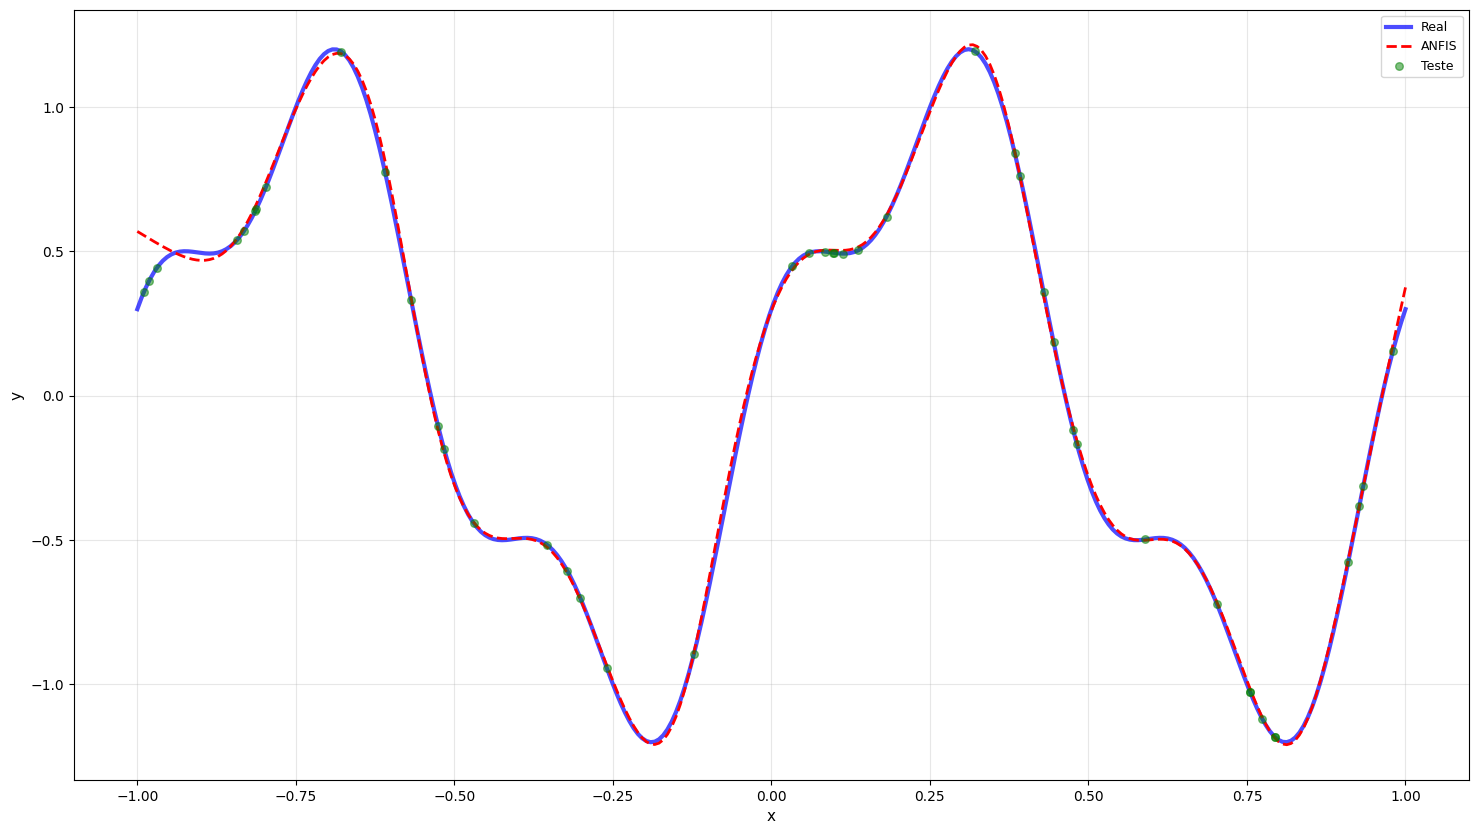

In [55]:
fig, ax = plt.subplots(figsize=(18, 10))

    
ax.plot(x_plot, y, 'b-', linewidth=3, alpha=0.7, label='Real')
ax.plot(x_plot, y_pred, 'r--', linewidth=2, label='ANFIS')
ax.scatter(X_test, y_test, c='green', s=30, alpha=0.5, label='Teste', zorder=5)

ax.set_xlabel('x', fontsize=11)
ax.set_ylabel('y', fontsize=11)
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)

plt.show()

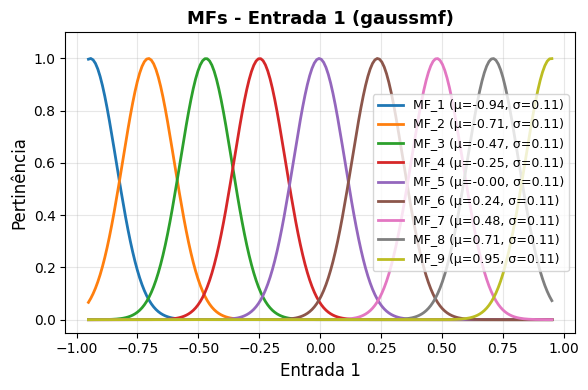

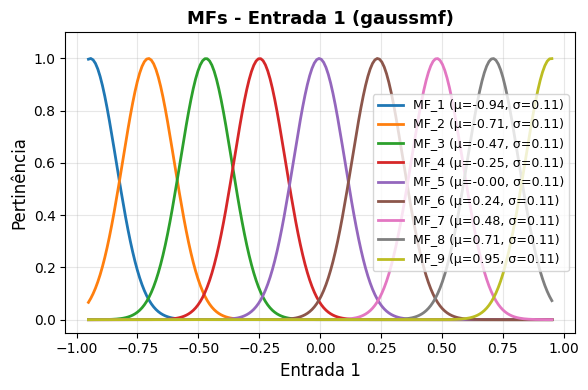

In [56]:
anfis.visualizar_mfs()

In [2]:
def exemplo_basico():
    """Exemplo básico de uso do ANFIS"""
    print("="*70)
    print("EXEMPLO 1: Uso Básico do ANFIS")
    print("="*70)

    # Gerar dados sintéticos
    np.random.seed(42)
    n_samples = 200
    X = np.random.uniform(-3, 3, (n_samples, 2))
    y = np.sin(X[:, 0]) + np.cos(X[:, 1]) + 0.1 * np.random.randn(n_samples)

    # Dividir em treino e validação
    split = int(0.8 * n_samples)
    X_train, X_val = X[:split], X[split:]
    y_train, y_val = y[:split], y[split:]

    # Criar e treinar ANFIS
    anfis = ANFIS(
        n_inputs=2,
        n_mfs=3,
        mf_type='gaussmf',
        learning_rate=0.01,
        lambda_l2=0.01,
        batch_size=32
    )

    print("\nTreinando ANFIS...")
    anfis.fit(X_train, y_train, epochs=50, verbose=True,
              X_val=X_val, y_val=y_val, early_stopping_patience=10)

    # Avaliar
    y_pred = anfis.predict(X_val)
    rmse = np.sqrt(np.mean((y_val - y_pred) ** 2))
    r2 = 1 - np.sum((y_val - y_pred)**2) / np.sum((y_val - y_val.mean())**2)

    print(f"\n{'='*70}")
    print(f"Resultados:")
    print(f"  RMSE: {rmse:.6f}")
    print(f"  R²:   {r2:.6f}")
    print(f"{'='*70}\n")

    return anfis

In [3]:
anfis_basico = exemplo_basico()

EXEMPLO 1: Uso Básico do ANFIS

Treinando ANFIS...

ANFIS - Treinamento
Arquitetura:
  • Entradas: 2
  • MFs por entrada: [3, 3]
  • Regras: 9
  • Tipo MF: gaussmf

Treinamento:
  • Modo: Minibatch GD
  • Samples: 160
  • Batch size: 32
  • Batches/época: 5

Regularização:
  • Tipo: Ridge (L2)
  • λ₁ (L1): 0.0
  • λ₂ (L2): 0.01

Inicializando consequentes com LSE...
RMSE inicial: 0.121565

Época   1/50 - Train RMSE: 6.895625, Val RMSE: 6.434479 | Custo: 47.607238
Época  10/50 - Train RMSE: 0.561472, Val RMSE: 0.787100 | Custo: 0.371813

Early stopping na época 19
Melhor RMSE validação: 0.561088

Treinamento concluído!


Resultados:
  RMSE: 0.561088
  R²:   0.622830



In [4]:
def exemplo_regularizacao():
    """Exemplo demonstrando efeito da regularização"""
    print("="*70)
    print("EXEMPLO 3: Comparação de Regularização")
    print("="*70)

    # Dados com ruído
    np.random.seed(42)
    X = np.random.uniform(-3, 3, (150, 2))
    y = np.sin(X[:, 0]) + np.cos(X[:, 1]) + 0.3 * np.random.randn(150)

    split = int(0.8 * len(X))
    X_train, X_val = X[:split], X[split:]
    y_train, y_val = y[:split], y[split:]

    configs = {
        'Sem regularização': {'lambda_l1': 0.0, 'lambda_l2': 0.0},
        'L2 (Ridge)': {'lambda_l1': 0.0, 'lambda_l2': 0.1},
        'L1 (Lasso)': {'lambda_l1': 0.1, 'lambda_l2': 0.0},
        'Elastic Net': {'lambda_l1': 0.05, 'lambda_l2': 0.05},
    }

    resultados = {}

    for nome, params in configs.items():
        print(f"\nTreinando com {nome}...")
        anfis = ANFIS(
            n_inputs=2,
            n_mfs=4,
            mf_type='gaussmf',
            learning_rate=0.01,
            **params
        )

        anfis.fit(X_train, y_train, epochs=30, verbose=False)

        y_pred_train = anfis.predict(X_train)
        y_pred_val = anfis.predict(X_val)

        rmse_train = np.sqrt(np.mean((y_train - y_pred_train) ** 2))
        rmse_val = np.sqrt(np.mean((y_val - y_pred_val) ** 2))

        resultados[nome] = {
            'rmse_train': rmse_train,
            'rmse_val': rmse_val,
            'overfitting': rmse_val - rmse_train
        }

        print(f"  RMSE Treino:    {rmse_train:.6f}")
        print(f"  RMSE Validação: {rmse_val:.6f}")
        print(f"  Overfitting:    {rmse_val - rmse_train:.6f}")

    print(f"\n{'='*70}")
    melhor = min(resultados, key=lambda k: resultados[k]['rmse_val'])
    print(f"Melhor configuração: {melhor}")
    print(f"  - Menor RMSE validação: {resultados[melhor]['rmse_val']:.6f}")
    print(f"  - Overfitting: {resultados[melhor]['overfitting']:.6f}")
    print(f"{'='*70}\n")

    return resultados

In [5]:
exemplo_regularizacao()

EXEMPLO 3: Comparação de Regularização

Treinando com Sem regularização...
  RMSE Treino:    0.219207
  RMSE Validação: 0.382266
  Overfitting:    0.163059

Treinando com L2 (Ridge)...
  RMSE Treino:    0.220789
  RMSE Validação: 0.386237
  Overfitting:    0.165448

Treinando com L1 (Lasso)...
  RMSE Treino:    0.219705
  RMSE Validação: 0.390731
  Overfitting:    0.171026

Treinando com Elastic Net...
  RMSE Treino:    0.221414
  RMSE Validação: 0.386052
  Overfitting:    0.164638

Melhor configuração: Sem regularização
  - Menor RMSE validação: 0.382266
  - Overfitting: 0.163059



{'Sem regularização': {'rmse_train': np.float64(0.21920721573795265),
  'rmse_val': np.float64(0.382266299785348),
  'overfitting': np.float64(0.16305908404739533)},
 'L2 (Ridge)': {'rmse_train': np.float64(0.22078900091345308),
  'rmse_val': np.float64(0.38623652587510127),
  'overfitting': np.float64(0.1654475249616482)},
 'L1 (Lasso)': {'rmse_train': np.float64(0.21970509178259542),
  'rmse_val': np.float64(0.3907310866247913),
  'overfitting': np.float64(0.17102599484219586)},
 'Elastic Net': {'rmse_train': np.float64(0.22141409185363348),
  'rmse_val': np.float64(0.38605208857035245),
  'overfitting': np.float64(0.16463799671671897)}}

In [6]:
def exemplo_tipos_mf():
    """Exemplo comparando diferentes tipos de MFs"""
    print("="*70)
    print("EXEMPLO 2: Comparação de Tipos de Funções de Pertinência")
    print("="*70)

    # Dados sintéticos
    np.random.seed(42)
    X = np.linspace(-3, 3, 100).reshape(-1, 1)
    y = np.sin(X).ravel() + 0.1 * np.random.randn(100)

    tipos_mf = ['gaussmf', 'gbellmf', 'sigmf']
    resultados = {}

    for mf_type in tipos_mf:
        print(f"\nTreinando com {mf_type}...")
        anfis = ANFIS(
            n_inputs=1,
            n_mfs=5,
            mf_type=mf_type,
            learning_rate=0.01,
            lambda_l2=0.01
        )

        anfis.fit(X, y, epochs=30, verbose=False)
        y_pred = anfis.predict(X)
        rmse = np.sqrt(np.mean((y - y_pred) ** 2))

        resultados[mf_type] = {
            'rmse': rmse,
            'anfis': anfis
        }

        print(f"  RMSE: {rmse:.6f}")

    print(f"\n{'='*70}")
    print("Melhor tipo de MF:", min(resultados, key=lambda k: resultados[k]['rmse']))
    print(f"{'='*70}\n")

    return resultados

In [7]:
exemplo_tipos_mf()

EXEMPLO 2: Comparação de Tipos de Funções de Pertinência

Treinando com gaussmf...
  RMSE: 0.087014

Treinando com gbellmf...
  RMSE: 0.090208

Treinando com sigmf...
  RMSE: 0.087174

Melhor tipo de MF: gaussmf



{'gaussmf': {'rmse': np.float64(0.08701426758905495),
  'anfis': <fuzzy_systems.learning.anfis_moderno.ANFIS at 0x107c54b50>},
 'gbellmf': {'rmse': np.float64(0.09020799140845459),
  'anfis': <fuzzy_systems.learning.anfis_moderno.ANFIS at 0x12a88e990>},
 'sigmf': {'rmse': np.float64(0.0871740373552017),
  'anfis': <fuzzy_systems.learning.anfis_moderno.ANFIS at 0x107c52c50>}}